This notebook shows the difference between full, unseen and train 1x1 grid cells of the pCO2 reconstructions using the Large Ensemble Testbed. 

This notebook was created by Thea Hatlen Heimdal, in collaboration with Abby Shaum.

In [ ]:
# Modules

import pandas as pd
import xarray as xr
import numpy as np
import numpy.ma as ma
%matplotlib inline
%config InlineBackend.figure_format = 'jpg'
%config InlineBackend.print_figure_kwargs = {'dpi':200, 'bbox_inches': 'tight'}
import matplotlib as mpl
from matplotlib.ticker import AutoMinorLocator
import matplotlib.pyplot as plt
import scipy
import sklearn.linear_model 
import pickle
import cmocean as cm
import seaborn as sns

In [2]:
# Bring in SOCAT-baseline reconstruction for one member of the LET
pam = xr.open_dataset("/local/data/artemis/workspace/theimdal/saildrone/TEST/SOCAT/xg/CESM/member_001/xg_recon_pC02_2D_mon_CESM_001_1x1_198201-201701.nc")

In [4]:
pam

<xarray.Dataset>
Dimensions:           (time: 421, xlon: 360, ylat: 180)
Coordinates:
  * time              (time) object 1982-02-01 00:00:00 ... 2017-02-01 00:00:00
  * xlon              (xlon) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * ylat              (ylat) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
Data variables:
    net_mask          (time, xlon, ylat) float32 ...
    socat_mask        (time, xlon, ylat) float64 ...
    pCO2_DIC          (time, xlon, ylat) float64 ...
    pCO2_DIC_recon    (time, xlon, ylat) float64 ...
    pCO2_DIC_socat    (time, xlon, ylat) float64 ...
    pCO2_DIC_nosocat  (time, xlon, ylat) float64 ...
    pCO2_DIC_test     (time, xlon, ylat) float64 ...
    pCO2_DIC_train    (time, xlon, ylat) float64 ...

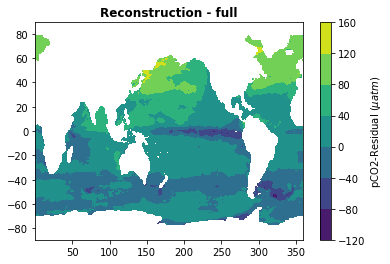

In [104]:
#Plot pCO2-Residual FULL reconstruction (includes everything, train, test, unseen)
fig = plt.figure()
plt.contourf(pam.pCO2_DIC_recon.xlon,pam.pCO2_DIC_recon.ylat,pam.pCO2_DIC_recon[410,:,:].transpose())
plt.title("Reconstruction - full", fontweight='bold')
plt.colorbar(label="pCO2-Residual ($\mu atm$)")
fig.savefig("/home/theimdal/full_recon",dpi=300, bbox_inches="tight")

In [29]:
# Calculate all 1x1 grid cells for the full reconstruction 
pco2DIC_recon_size = np.count_nonzero(~np.isnan(pam.pCO2_DIC_recon))
pco2DIC_recon_size

14200255

In [96]:
# Calculate 1x1 grid cells for one specific month for the full reconstruction
pco2DIC_recon_size = np.count_nonzero(~np.isnan(pam.pCO2_DIC_recon[410,:,:]))
pco2DIC_recon_size

33730

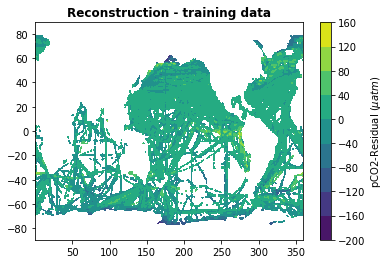

In [52]:
#TRAIN ONLY all months
fig = plt.figure()
plt.contourf(pam.pCO2_DIC_train.xlon,pam.pCO2_DIC_train.ylat,pam.pCO2_DIC_train.mean('time').transpose())
plt.title("Reconstruction - training data", fontweight='bold')
plt.colorbar(label="pCO2-Residual ($\mu atm$)")

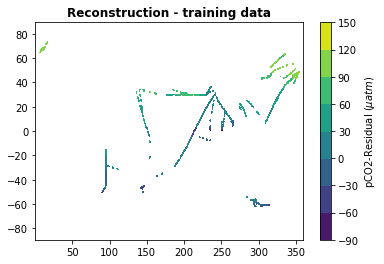

In [103]:
#TRAIN ONLY one specific month
fig = plt.figure()
plt.contourf(pam.pCO2_DIC_train.xlon,pam.pCO2_DIC_train.ylat,pam.pCO2_DIC_train[410,:,:].transpose())
plt.title("Reconstruction - training data", fontweight='bold')
plt.colorbar(label="pCO2-Residual ($\mu atm$)")
fig.savefig("/home/theimdal/train_recon",dpi=300, bbox_inches="tight")

In [10]:
# Calculate all 1x1 grid cells for the training data
train = np.count_nonzero(~np.isnan(pam.pCO2_DIC_train))
train

175606

In [98]:
# Calculate 1x1 grid cells for one specific month for the training data
train = np.count_nonzero(~np.isnan(pam.pCO2_DIC_train[410,:,:]))
train

1190

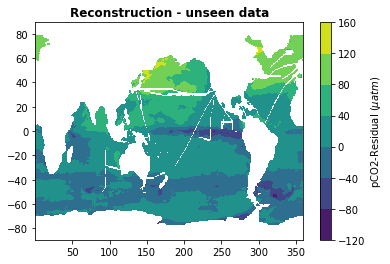

In [102]:
#UNSEEN RECONSTRUCTION
fig = plt.figure()
plt.contourf(pam.pCO2_DIC_nosocat.xlon,pam.pCO2_DIC_nosocat.ylat,pam.pCO2_DIC_nosocat[410,:,:].transpose())
plt.title("Reconstruction - unseen data", fontweight='bold')
plt.colorbar(label="pCO2-Residual ($\mu atm$)")
fig.savefig("/home/theimdal/unseen_recon",dpi=300, bbox_inches="tight")

In [12]:
# Calculate all 1x1 grid cells for the unseen reconstruction
unseen = np.count_nonzero(~np.isnan(pam.pCO2_DIC_nosocat))
unseen

13979526

In [97]:
# Calculate 1x1 grid cells for one specific month for the unseen reconstruction
unseen = np.count_nonzero(~np.isnan(pam.pCO2_DIC_nosocat[410,:,:]))
unseen

32540